In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets/Tweets.csv


In [2]:
df = pd.read_csv("/kaggle/input/tweets/Tweets.csv")

In [3]:
# Importing required libraries
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

In [4]:
Data = df[['non_punctuated_tweets','sentiment']]

In [5]:
Data

,non_punctuated_tweets,sentiment
0,put hours game last year still holds well blas...,positive
1,story great terrible,positive
2,jaedo event bought tickets nd quarter finally ...,negative
3,year going super dynamic bc im graduating uni ...,positive
4,literally tough year none plan going right pre...,positive
...,...,...
17769,really rough one mental health truly feel many...,positive
17770,happy new year everyone except boy dated coupl...,positive
17771,crazy bought car moved shot porn butt plug bum...,negative
17772,think descent art year despite able use tablet...,neutral


In [6]:
Data['tokenized_tweets'] = Data.apply(lambda row : nltk.word_tokenize(str(row['non_punctuated_tweets'])),axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
Data

,non_punctuated_tweets,sentiment,tokenized_tweets
0,put hours game last year still holds well blas...,positive,"[put, hours, game, last, year, still, holds, w..."
1,story great terrible,positive,"[story, great, terrible]"
2,jaedo event bought tickets nd quarter finally ...,negative,"[jaedo, event, bought, tickets, nd, quarter, f..."
3,year going super dynamic bc im graduating uni ...,positive,"[year, going, super, dynamic, bc, im, graduati..."
4,literally tough year none plan going right pre...,positive,"[literally, tough, year, none, plan, going, ri..."
...,...,...,...
17769,really rough one mental health truly feel many...,positive,"[really, rough, one, mental, health, truly, fe..."
17770,happy new year everyone except boy dated coupl...,positive,"[happy, new, year, everyone, except, boy, date..."
17771,crazy bought car moved shot porn butt plug bum...,negative,"[crazy, bought, car, moved, shot, porn, butt, ..."
17772,think descent art year despite able use tablet...,neutral,"[think, descent, art, year, despite, able, use..."


In [8]:
def lemma(data):
    return " ".join([Word(word).lemmatize() for word in data])
Data['lemmatized_tweets']= Data['tokenized_tweets'].apply(lambda x: lemma(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
Data

,non_punctuated_tweets,sentiment,tokenized_tweets,lemmatized_tweets
0,put hours game last year still holds well blas...,positive,"[put, hours, game, last, year, still, holds, w...",put hour game last year still hold well blast ...
1,story great terrible,positive,"[story, great, terrible]",story great terrible
2,jaedo event bought tickets nd quarter finally ...,negative,"[jaedo, event, bought, tickets, nd, quarter, f...",jaedo event bought ticket nd quarter finally p...
3,year going super dynamic bc im graduating uni ...,positive,"[year, going, super, dynamic, bc, im, graduati...",year going super dynamic bc im graduating uni ...
4,literally tough year none plan going right pre...,positive,"[literally, tough, year, none, plan, going, ri...",literally tough year none plan going right pre...
...,...,...,...,...
17769,really rough one mental health truly feel many...,positive,"[really, rough, one, mental, health, truly, fe...",really rough one mental health truly feel many...
17770,happy new year everyone except boy dated coupl...,positive,"[happy, new, year, everyone, except, boy, date...",happy new year everyone except boy dated coupl...
17771,crazy bought car moved shot porn butt plug bum...,negative,"[crazy, bought, car, moved, shot, porn, butt, ...",crazy bought car moved shot porn butt plug bum...
17772,think descent art year despite able use tablet...,neutral,"[think, descent, art, year, despite, able, use...",think descent art year despite able use tablet...


In [10]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 500
# Max number of words in each tweets.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

In [11]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, split=' ') 
tokenizer.fit_on_texts(Data.lemmatized_tweets.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22546 unique tokens.


In [12]:
X = tokenizer.texts_to_sequences(Data.lemmatized_tweets.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (17774, 50)


In [13]:
Y = pd.get_dummies(Data.sentiment).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (17774, 3)


In [14]:
Y

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(14219, 50) (14219, 3)
(3555, 50) (3555, 3)


In [16]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
f1 = tfa.metrics.F1Score(36,'micro' or 'macro')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])

epochs = 7
batch_size = 64

2022-01-07 00:34:55.360794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 00:34:55.440098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 00:34:55.440806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 00:34:55.441902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
history_1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

2022-01-07 00:35:01.972394: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7
200/200 [==============================] - 50s 232ms/step - loss: 0.7615 - accuracy: 0.7096 - f1_score: 0.7096 - val_loss: 0.7293 - val_accuracy: 0.7082 - val_f1_score: 0.7082
Epoch 2/7
200/200 [==============================] - 47s 237ms/step - loss: 0.6964 - accuracy: 0.7180 - f1_score: 0.7180 - val_loss: 0.7269 - val_accuracy: 0.7032 - val_f1_score: 0.7032
Epoch 3/7
200/200 [==============================] - 46s 230ms/step - loss: 0.6637 - accuracy: 0.7346 - f1_score: 0.7346 - val_loss: 0.7089 - val_accuracy: 0.7194 - val_f1_score: 0.7194
Epoch 4/7
200/200 [==============================] - 48s 239ms/step - loss: 0.6417 - accuracy: 0.7398 - f1_score: 0.7398 - val_loss: 0.6937 - val_accuracy: 0.7215 - val_f1_score: 0.7215
Epoch 5/7
200/200 [==============================] - 47s 233ms/step - loss: 0.6141 - accuracy: 0.7539 - f1_score: 0.7539 - val_loss: 0.6680 - val_accuracy: 0.7342 - val_f1_score: 0.7342
Epoch 6/7
200/200 [==============================] - 46s 231ms/step - 

In [19]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

112/112 [==============================] - 2s 14ms/step - loss: 0.6608 - accuracy: 0.7474 - f1_score: 0.7474
Test set
  Loss: 0.661
  Accuracy: 0.747


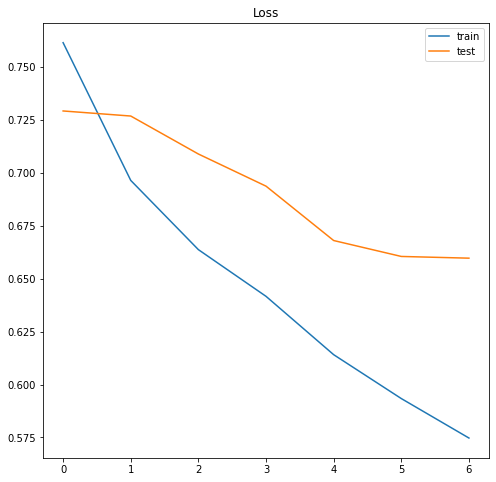

In [20]:
plt.figure(figsize=(8, 8))
plt.title('Loss')
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.legend()
plt.show();

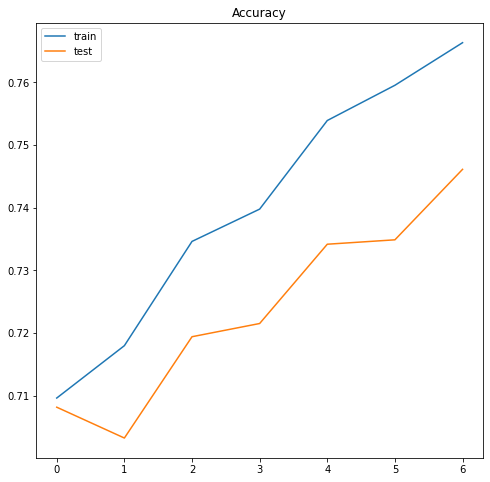

In [21]:
plt.figure(figsize=(8, 8))
plt.title('Accuracy')
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [22]:
tweet = ["I keep seeing all these posts about how  2021 was terrible for lots of people... and it's sad, because it was a very good year for me."]
seq = tokenizer.texts_to_sequences(tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['negative','neutral','positive']
print(pred, labels[np.argmax(pred)])

[[0.1166406  0.02953981 0.8538196 ]] positive
